## Low Pass Filters
***
Low pass filters are effective at blurring and smoothing images and can reduce image noise. The filters and blurs that will be discussed are the mean/box filter, the gaussian blur, and the median blur. Images are filtered using small matrices known as kernels, which output a new pixel value by taking the neighborhood of the current pixel and calculating an output value. A neighborhood is essentially the pixels surrounding the current pixel based on the kernel size. For example the neighborhood for a 3 x 3 kernel would look like this:
<center><img src='http://what-when-how.com/wp-content/uploads/2012/07/tmp26dc134_thumb_thumb.png'></center>

Image source: http://what-when-how.com/introduction-to-video-and-image-processing/neighborhood-processing-introduction-to-video-and-image-processing-part-1/

To apply the kernel to edge pixels, rows of zeros are usually padded around the image edges.


***
#### Mean/Box Filter
The mean filter is the most straightforward out of all of the smoothing filters. The mean of the kernel is calculated, and that mean becomes the new pixel value. The mean filter can be applied using either the blur() method or boxFilter() method.

In [1]:
# Notebook imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

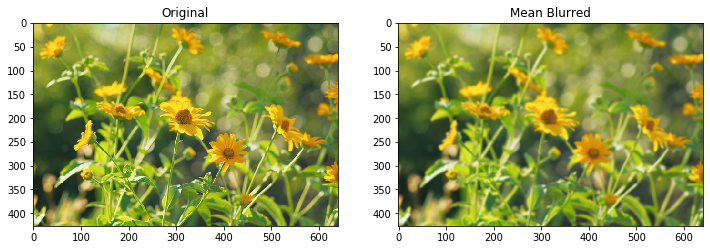

In [7]:
flowers = cv2.imread('../Image_Data/flowers.jpg')
flowers = cv2.cvtColor(flowers, cv2.COLOR_BGR2RGB)
mean_blurred_flowers = cv2.blur(flowers, (5,5))

fig, axarr = plt.subplots(1, 2, figsize=(12, 12))
axarr[0].set_title('Original')
axarr[0].imshow(flowers)
axarr[1].set_title('Mean Blurred')
axarr[1].imshow(mean_blurred_flowers)

A 5x5 mean blur kernel was applied to the flowers image, the result of which is shown on the right. 

***
#### Gaussian Blur

In [21]:
# Attempts at calculating a Gaussian blur kernel from scratch :D
# getting variance: first need to calculate mean, then get mean of squared distances
# Then plug in variance for 2D Gaussian function - done :D
# Problem: what do x and y mean in the Gaussian function equation?
# How do I calculate the Gaussian function in the first place?
import math 
flowers_gray = cv2.cvtColor(flowers, cv2.COLOR_RGB2GRAY)
mean, stdev = cv2.meanStdDev(flowers_gray)
hist = cv2.calcHist([flowers_gray], [0], None, [256], [0,256])
variance = stdev ** 2
# plt.plot(hist)
hist.max

<function ndarray.max>

***
#### Median Filter/Blur
Just as the name suggests, the median blur takes the median value in the neighborhood of the kernel, which becomes the new value for that pixel in question. The median blur can help remove single pixel noise known as salt and pepper noise. The following code adds random noise to the flowers image to better demonstrate the performance of the median blur.

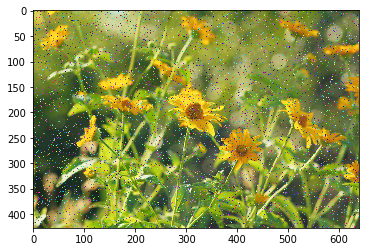

In [44]:
# adding noise to flowers image
import random
noisy_flowers = flowers.copy()
for i in range(24000):
    rand_x = random.randint(0, len(noisy_flowers) - 1)
    rand_y = random.randint(0, len(noisy_flowers[0]) - 1)
    noisy_flowers[rand_x, rand_y, :] = np.array([random.randint(0, 255), 
                                                 random.randint(0, 255), 
                                                 random.randint(0, 255)], dtype='uint8')
plt.imshow(noisy_flowers)

A median blur can now be applied to the noisy image. In the following code, a kernel size of 5 is applied to the noisy image.

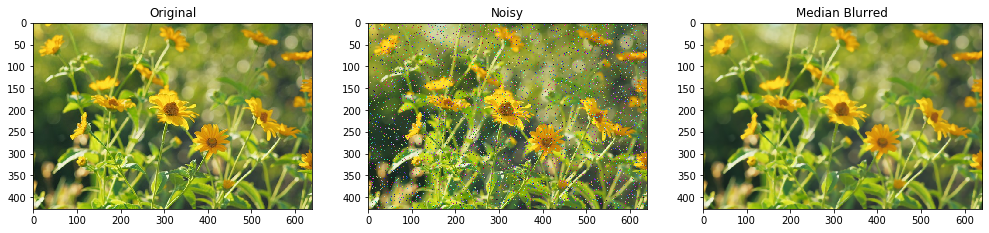

In [48]:
# applying median blur to reduce noise
flowers_median_blur = cv2.medianBlur(noisy_flowers, 5)
fig, axarr = plt.subplots(1, 3, figsize=(17, 17))
axarr[0].set_title('Original')
axarr[0].imshow(flowers)
axarr[1].set_title('Noisy')
axarr[1].imshow(noisy_flowers)
axarr[2].set_title('Median Blurred')
axarr[2].imshow(flowers_median_blur)

After applying median filtering, the amount of noise has successfully been drastically reduced at the expense of some of the sharpness in the details of the resulting image.

***
## References
* Low Pass Filter Examples: https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html
* Gaussian Blurring: https://en.wikipedia.org/wiki/Gaussian_blur
* Median Filter/Blur: https://en.wikipedia.org/wiki/Median_filter
* Amazing Kernel Visualizations: https://setosa.io/ev/image-kernels/
***